# Optimisation

## One-dimensional optimisation

A necessary and sufficient condition for a local minimum of a twice differentiable function $f:\mathbf{R}\to \mathbf{R}$

$$f'(x_0) = 0, \qquad f''(x_0) > 0$$

Here we want to optimize a univariate function:

$$f(x)=4x^2e^{-2x}$$

We first define the function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1simple(x):
    # gamma(2,3) density
    if (x < 0):
        return (0)
    if (x == 0):
        return (np.nan)
    y = np.exp(-2*x)
    return (4 * x**2 * y)

Next we define the same function but return $f(x)$, $f'(x)$, and $f''(x)$.

$$f'(x)=4(2xe^{-2x}+(-2)x^2e^{-2x})=8x(1-x)e^{-2x}$$
$$f''(x)=8e^{-2x}(1-4x+2x^2)$$

In [3]:
def f1(x):
    # gamma(2,3) density
    if (x < 0):
        return np.array([0, 0, 0])
    if (x == 0):
        return np.array([0, 0, np.nan])
    y = np.exp(-2.0*x)
    return np.array([4.0 * x**2.0 * y, \
      8.0 * x*(1.0-x)*y, \
      8.0*(1 - 4*x + 2 * x**2)*y])

Plotting the function is always a good idea!

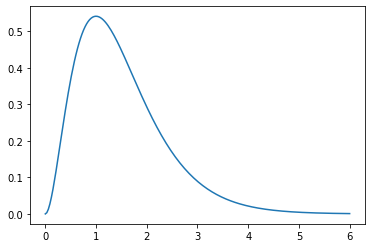

In [4]:
xmin = 0.0
xmax = 6.0
xv = np.linspace(xmin, xmax, 200)
fx = np.zeros(len(xv),float) # define column vector
for i in range(len(xv)):
    fx[i] = f1(xv[i])[0]

fig, ax = plt.subplots()
ax.plot(xv, fx)
plt.show()

### Newton’s Method

In order to implement the Newton method we basically look for the root of a first derivative so that $f'(x)=0$.

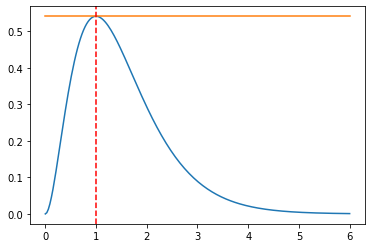

In [5]:
myOpt = 1.0
fmaxval = f1simple(myOpt)

xmin = 0.0
xmax = 6.0
xv = np.linspace(xmin, xmax, 200)
fx = np.zeros(len(xv),float) # define column vector
for i in range(len(xv)):
    fx[i] = f1(xv[i])[0]

fig, ax = plt.subplots()
ax.plot(xv, fx)
ax.plot(xv, fmaxval*np.ones(len(xv)))
ax.axvline(x = myOpt, ymin=0.0, color='r', linestyle='--')
plt.show()

We then use an adjustment of the Newthon-Raphson Root Finding Algorithm to find this point. 

Newthon-Raphson Root Finding Algorithm:

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

We have to adjust this of course because the function we search the foot for is already the first derivative of a function, so that we have:

$$x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)}$$

In [6]:
def newton(f3, x0, tol = 1e-9, nmax = 100):
    # Newton's method for optimization, starting at x0
    # f3 is a function that given x returns the vector
    # (f(x), f'(x), f''(x)), for some f
    x = x0
    f3x = f3(x)
    n = 0
    while ((abs(f3x[1]) > tol) and (n < nmax)):
        x = x - f3x[1]/f3x[2]
        f3x = f3(x)
        n = n + 1
    if (n == nmax):
        print("newton failed to converge")
    else:
        return(x)

We use these algorithms to find the maximum point of our function `f1`. Note that if we use the Newton algorithm we will need the first and second derivatives of the functions. This is why we use function f1 that returns f, f' and f'' via an array/vector as return value.

In [7]:
print(" -----------------------------------")
print(" Newton results ")
print(" -----------------------------------")
print(newton(f1, 0.25))
print(newton(f1, 0.5))
print(newton(f1, 0.75))
print(newton(f1, 1.75))

 -----------------------------------
 Newton results 
 -----------------------------------
-1.25
1.0
0.9999999999980214
14.42367881581733


Derivatives are oft hard to compute; therefore a numerical method that does not require the derivative is preferable. An example is bisection in the golden ratio (homework problem 10).


### Bisection in the golden-section

The golden-section method works in one dimension only, but does not need the derivatives of the function. However, the function still needs to be continuous. In order to determine whether there is a local maximum we need three points. Then we can use the following:

If $x_l<x_m<x_r$ and 
1. $f(x_l)\le f(x_m)$ and 
2. $f(x_r)\le f(x_m)$ then there must be a local maximum in the interval between $[x_l,x_r]$

This method is very similar to the bisection method (root bracketing).

The method starts with three starting values and operates by successively narrowing the range of values on the specified interval, which makes it relatively slow, but very robust. The technique derives its name from the fact that the algorithm maintains the function values for four points whose three interval widths are in the ratio

$$2-\varphi :2 \times \varphi -3 : 2 - \varphi$$

where $\varphi$ (phi) is the [golden ratio](https://en.wikipedia.org/wiki/Golden_ratio).

In mathematics, two quantities $a$ and $b$ are in the golden ratio if their ratio is the same as the ratio of their sum to the larger of the two quantities. Assume $a>b$ then the ratio:

$$\frac{a}{b}=\frac{a+b}{a}=\varphi$$

Note: $a+b$ is to $a$ as $a$ is to $b$.
![Line segments in the golden ratio](https://upload.wikimedia.org/wikipedia/commons/a/a6/Golden_ratio_line.png "Line segments in the golden ratio")

The golden ratio is the solution of the quadratic equation:

$$\varphi^2 - \varphi - 1 = 0$$

so that 

$$\varphi = \frac{1\pm\sqrt{5}}{2}=1.6180339887$$

#### Algorithm

1. if $x_r-x_l\le \epsilon$ then stop
2. if $x_r-x_m>x_m-x_l$ then do (a) otherwise do (b)

    a. Let $y=x_m+(x_r-x_m)/(1+\varphi)$; if $f(y)\ge f(x_m)$ then put $x_l=x_m$ and $x_m = y$; otherwise put $x_r=y$
    
    b. Let $y=x_m+(x_m-x_l)/(1+\varphi)$; if $f(y)\ge f(x_m)$ then put $x_r=x_m$ and $x_m = y$; otherwise put $x_l=y$
    
3. go back to step 1.


In [8]:
def gsection(ftn, xl, xm, xr, tol = 1e-9):
    # applies the golden-section algorithm to maximise ftn
    # we assume that ftn is a function of a single variable
    # and that x.l < x.m < x.r and ftn(x.l), ftn(x.r) <= ftn(x.m)
    #
    # the algorithm iteratively refines x.l, x.r, and x.m and
    # terminates when x.r - x.l <= tol, then returns x.m
    # golden ratio plus one
    gr1 = 1 + (1 + np.sqrt(5))/2
    #
    # successively refine x.l, x.r, and x.m
    fl = ftn(xl)
    fr = ftn(xr)
    fm = ftn(xm)
    while ((xr - xl) > tol):
        if ((xr - xm) > (xm - xl)):
            y = xm + (xr - xm)/gr1
            fy = ftn(y)
            if (fy >= fm):
                xl = xm
                fl = fm
                xm = y
                fm = fy
            else:
                xr = y
                fr = fy
        else:
            y = xm - (xm - xl)/gr1
            fy = ftn(y)
            if (fy >= fm):
                xr = xm
                fr = fm
                xm = y
                fm = fy
            else:
                xl = y
                fl = fy
    return(xm)

We next use this algorithms to find the maximum point of our function `f1simple`. The Golden section algorithm does not require the derivates of the function, so we just call the `f1simple` function that only returns the functional value.

In [9]:
print(" -----------------------------------")
print(" Golden section results ")
print(" -----------------------------------")
myOpt = gsection(f1simple, 0.1, 0.25, 1.3)
print(gsection(f1simple, 0.1, 0.25, 1.3))
print(gsection(f1simple, 0.25, 0.5, 1.7))
print(gsection(f1simple, 0.6, 0.75, 1.8))
print(gsection(f1simple, 0.0, 2.75, 5.0))

 -----------------------------------
 Golden section results 
 -----------------------------------
1.0000000117853984
1.0000000107340477
0.9999999921384167
1.0000000052246139


We can also use a built in function minimizer. The built in function `fmin` is in the `scipy.optimize` library. We need to import it first. So if we want to maximize our function we have to define it as a negated function, that is:

$$g(x)=-f(x)$$

then

$$\min g(x)$$

is the same as 

$$\max f(x)$$

Since we want to find the maximum of the function, we need to “trick” the minimization algorithm. We therefore need to redefine the function as

In [10]:
def f1simpleNeg(x):
    # gamma(2,3) density
    if (x < 0):
        return (0)
    if (x == 0):
        return (np.nan)
    y = np.exp(-2*x)
    return (-(4 * x**2 * y))

Here we simply return negative values of this function. If we now minimize this function, we actually maximize the original function

$$f(x)=4x^2e^{-2x}$$

In [11]:
from scipy.optimize import fmin

print(" -----------------------------------")
print(" fmin results ")
print(" -----------------------------------")
print(fmin(f1simpleNeg, 0.25))
print(fmin(f1simpleNeg, 0.5))
print(fmin(f1simpleNeg, 0.75))
print(fmin(f1simpleNeg, 1.75))

 -----------------------------------
 fmin results 
 -----------------------------------
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 18
         Function evaluations: 36
[1.]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 16
         Function evaluations: 32
[1.]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 14
         Function evaluations: 28
[0.99997559]
Optimization terminated successfully.
         Current function value: -0.541341
         Iterations: 16
         Function evaluations: 32
[1.00001221]


## Multivariate Optimization

# Function

Here we want to optimize the following function `f3`

In [12]:
def f3simple(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = np.sin(a)*np.cos(b)
    return(f)

Its negative version:

In [13]:
def f3simpleNeg(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = -np.sin(a)*np.cos(b)
    return(f)

And the version that returns $f(x)$, $f'(x)$ (i.e., the gradient), and $f''(x)$ (i.e., the Hessian matrix):

In [14]:
def f3(x):
    a = x[0]**2/2.0 - x[1]**2/4.0
    b = 2*x[0] - np.exp(x[1])
    f = np.sin(a)*np.cos(b)
    f1 = np.cos(a)*np.cos(b)*x[0] - np.sin(a)*np.sin(b)*2
    f2 = -np.cos(a)*np.cos(b)*x[1]/2 + np.sin(a)*np.sin(b)*np.exp(x[1])
    f11 = -np.sin(a)*np.cos(b)*(4 + x[0]**2) + np.cos(a)*np.cos(b) \
        - np.cos(a)*np.sin(b)*4*x[0]
    f12 = np.sin(a)*np.cos(b)*(x[0]*x[1]/2.0 + 2*np.exp(x[1])) \
        + np.cos(a)*np.sin(b)*(x[0]*np.exp(x[1]) + x[1])
    f22 = -np.sin(a)*np.cos(b)*(x[1]**2/4.0 + np.exp(2*x[1])) \
        - np.cos(a)*np.cos(b)/2.0 - np.cos(a)*np.sin(b)*x[1]*np.exp(x[1]) \
        + np.sin(a)*np.sin(b)*np.exp(x[1])
    # Function f3 returns: f(x), f'(x), and f''(x)
    return (f, np.array([f1, f2]), np.array([[f11, f12], [f12, f22]]))

We next plot the function:

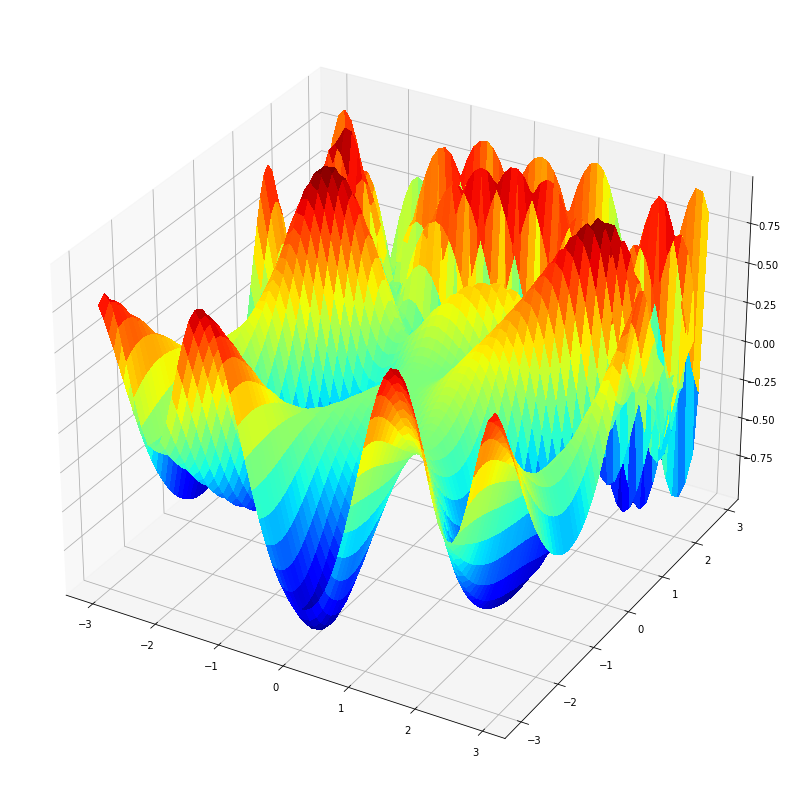

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 16))
ax = plt.gca(projection='3d')

X = np.arange(-3, 3, .1)
Y = np.arange(-3, 3, .1)
X, Y = np.meshgrid(X, Y)

Z = np.zeros((len(X),len(Y)),float)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i][j] = f3simple([X[i][j],Y[i][j]])

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, \
    cmap=plt.cm.jet, linewidth=0, antialiased=False)
plt.show()

### Multivariate Newton Method

In [16]:
def newtonMult(f3, x0, tol = 1e-9, nmax = 100):
    # Newton's method for optimisation, starting at x0
    # f3 is a function that given x returns the list
    # {f(x), grad f(x), Hessian f(x)}, for some f
    x = x0
    f3x = f3(x)
    n = 0
    while ((max(abs(f3x[1])) > tol) and (n < nmax)):
        x = x - np.linalg.solve(f3x[2], f3x[1])
        f3x = f3(x)
        n = n + 1
    if (n == nmax):
        print("newton failed to converge")
    else:
        return(x)

Compare the Newton method with the built in `fmin` method in `scipy.optimize`. We use various starting values to see whether we can find more than one optimum.

In [17]:
from scipy.optimize import fmin

for x0 in np.arange(1.4, 1.6, 0.1):
    for y0 in np.arange(0.4, 0.7, 0.1):
        # This algorithm requires f(x), f'(x), and f''(x)
        print("Newton: f3  " + str([x0,y0]) + ' --> ' + str(newtonMult(f3, \
            np. array([x0,y0]))))

        print("fmin: f3 " + str([x0,y0]) + ' --> ' \
            + str(fmin(f3simpleNeg, np.array([x0,y0]))))

        print(" ----------------------------------------- ")

Newton: f3  [1.4, 0.4] --> [ 0.04074437 -2.50729047]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 47
         Function evaluations: 89
fmin: f3 [1.4, 0.4] --> [2.0307334  1.40155445]
 ----------------------------------------- 
Newton: f3  [1.4, 0.5] --> [0.11797341 3.34466147]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 50
         Function evaluations: 93
fmin: f3 [1.4, 0.5] --> [2.03072555 1.40154756]
 ----------------------------------------- 
Newton: f3  [1.4, 0.6] --> [-1.5531627  6.0200129]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 43
         Function evaluations: 82
fmin: f3 [1.4, 0.6] --> [2.03068816 1.40151998]
 ----------------------------------------- 
Newton: f3  [1.5, 0.4] --> [2.83714224 5.35398196]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: